In [1]:
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from itertools import permutations
import re

Открываем корпус, выбираем из него только тексты (без даты, автора и т.п.), избавляемся от стоп-слов и пунктуации. Создаем список слов текста и убираем из него пустые строки.

In [2]:
n_window = 5 # можно вставить любое число: это и будет нашей длиной окна, в котором могут находиться два слова
with open('full_texts.txt', 'r') as file:
    text = file.read()
    text = re.findall(r'==\n.+\n.+\n.+\n.+\n.+\n(.+)\n===', text)
text_ = ''
for t in text:
    text_ += str(t)

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'свой', 'то', 'ещё'])

text_ = re.sub(r'[^\w\s]', ' ', text_)
# print(text_)

text = text_.split(' ')
list_of_words = []
for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = text[i].strip('')
    if text[i] not in stops and text[i] != '':
        list_of_words.append(text[i])


В заданном окне создаем permutations от всех слов, чтобы потом считать, как часто два слова находились в таком окне.

In [3]:
graph_connections = []


def process(window):
    perms = permutations(window, 2)
    for p in perms:
        graph_connections.append(p)


for i, word in enumerate(text):
    if i == len(list_of_words)-n_window:
        break
    else:
        window = list_of_words[i:i+n_window]
        process(window)

Создаем граф: вершинами будут все слова, ребра будут иметь значение из предыдущей ячейки.

In [4]:
frequencies = Counter(list_of_words)
pre_graph = dict(Counter(graph_connections))
cnt = len(pre_graph)
nodes = list(set(list_of_words))
data = []
for l in pre_graph.keys():
    data.append([l[0], l[1], pre_graph[l]])

vector_dict = defaultdict(lambda: None)

Строим граф:

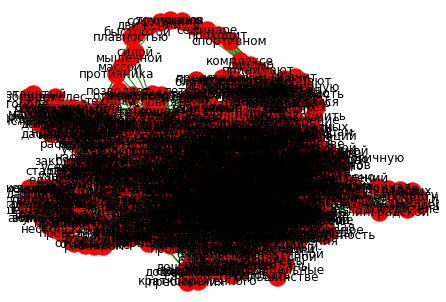

In [62]:
def buildGraph(data, thr=0.):
    G1 = nx.Graph()
    for p1, p2, w in data:
        if float(w) >= thr:
            G1.add_edge(p1, p2)
    return G1


def drawGraph(G):
    pstn = nx.spring_layout(G)
    _ = nx.draw(G, pos=pstn, with_labels=True, node_color='r', edge_color='g')


def buildAndDrawGraph(data, thr=0):
    G1 = buildGraph(data, thr)
    drawGraph(G1)
    return G1

buildAndDrawGraph(data)

Создаем словарь, в котором для каждой вершины значением будет defaultdict со смежными ей вершинами и значением инцидентого им ребра.

In [5]:
for n in nodes:
    vector_dict[n] = defaultdict(int)

for k in data:
    vector_dict[k[0]][k[1]] = frequencies[k[1]]

Чтобы посчитать для каждой вершины показатель Ципфа, нам нужно найти 2 смежные ей вершины с наибольшими значениями инцидентного им ребра. Это будет храниться в словаре ziphs, ключами которого будут слова, а значениями - их показатели Ципфа.

In [6]:
ziphs = {}
for s in vector_dict.keys():
    default = dict(vector_dict[s])
    default = list(sorted(default.values()))
    if len(default) >= 2:
        maximum = default[-1]
        maximum2 = default[-2]
        personal_ziph = maximum / maximum2
        ziphs.update({s: personal_ziph})

Находим средний показатель Ципфа для всего корпуса:

In [7]:
def find_average_ziph(ziphs):
    all_ziphs = list(ziphs.values())
    average_ziph = sum(all_ziphs) / len(all_ziphs)
    return average_ziph

average_ziph = find_average_ziph(ziphs)

Наконец, отбираем такие слова, для которых показатель ципфа более чем в два раза больше среднего и выводим их список:

In [8]:
out_ziphs = []
for k, v in ziphs.items():
    if v / average_ziph > 2:
        out_ziphs.append(k)

print(out_ziphs)

['кобург', 'мерзловского', 'бауке', 'австрийское', 'пустопорожних', 'капа', 'палисадником', 'тналиева', 'квестами', 'скерцо', 'накопительном', 'инкубации', 'приветствиями', 'заряжайтесь', 'аннунаков', 'мэркури', 'пятилепестковым', 'καλλιγραφα', 'заразительными', 'рестович', 'германцы', 'мошенничествонесмотря', 'древках', 'поясничные', 'абакане', 'провоцирующие', 'инвазивные', 'моложавой', 'иммунитету', 'рекрутинговыми', 'мнем', 'гастроэнтерологии', 'жердер', 'ныряниепоиск', 'ренфорд', 'бежевых', 'чикиляиш', 'сепараторную', 'эпоксидной', 'норвежкой', '54809', 'коврижек', 'центрифуга', 'конденсате', 'гиперзвуковых', 'лавкой', 'строящие', 'похитивший', 'иноземным', '\xa0несколько', 'желтоголовый', 'денисовича', 'скрывающей', 'нено', 'опоссумом', 'балдина', 'звероловами', 'гимназисту', 'свинарнику', 'действую', 'муковисцидоз', 'попросишься', 'дольф', 'освобождено', 'анбарное', 'пролетарск', 'минная', 'перепадают', 'расслоением', 'насмеялись', 'ирмой', 'пиршеств', 'джампстайл', 'плохово', '